In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Defining path of the training data
dataset_paths = "\\Users\\Yash\\Desktop\\GAIP\\dataset_characters"

In [3]:
X=[]
label=[]
# print (dataset_paths)
i=0
for f in os.listdir(dataset_paths):
  file_path = dataset_paths+"\\"+f #f == '0','1' etc
  print(f)
  for fn in os.listdir(file_path):
    # print(fn)
    label.append(f)
    # print(labels[i])
    i = i+1
    img_path = file_path + "\\" + fn
    img = load_img(img_path,target_size=(80,80))
    image=img_to_array(img)
    X.append(image) #X contains the images as numpy

0
1
2
3
4
5
6
7
8
9
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [6]:
len(labels)

37623

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


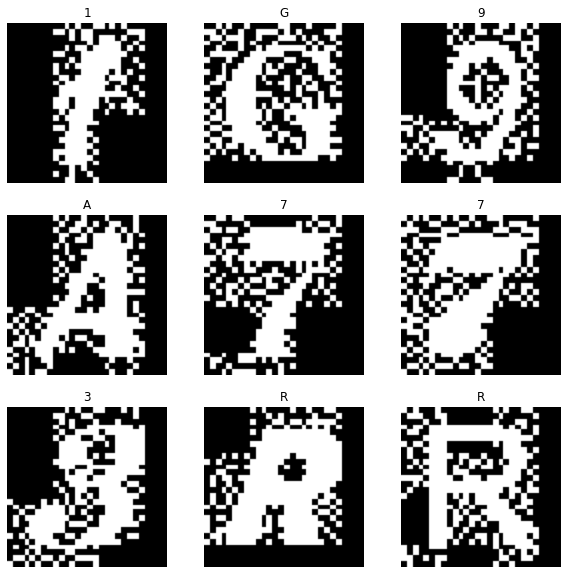

In [4]:
import random
plt.figure(figsize=(10, 10))
j=1000
for j in range(9):
    r = random.randint(0,30000)
    ax = plt.subplot(3, 3, j + 1)
    plt.imshow(X[r])
    plt.title(label[r])
    plt.axis("off")

In [6]:
classes={'0':0, '1':1, '2':2,
 '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18, 'J':19, 'K':20, 'L':21,
 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35}
labels=[]
random_n = 21
for i in range(len(label)):
    key = label[i]
    p = classes.get(key)
    labels.append(p)
                  
                  
                  
                  
#print(key)

# plt.imshow(X_train[random_n])

In [ ]:
np.shape(X)

In [ ]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)
print(np.shape(X_train), np.shape(y_train))
print(np.shape(X_test), np.shape(y_test))

(30098, 80, 80, 3) (30098,)
(7525, 80, 80, 3) (7525,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


24520
22


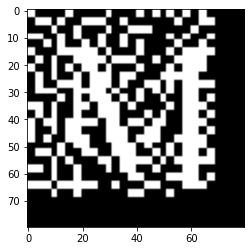

In [30]:
r = random.randint(0,30000)
print(r)
plt.imshow(X_train[r])
print(y_train[r]) 

In [24]:
np.save('data_f.npy', X) # save
np.save('labels_final',labels)
X = np.load('data_f.npy') # load
labels = np.load('labels_final.npy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


None


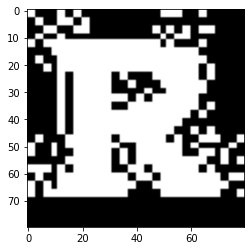

In [12]:
classes={'0':0, '1':1, '2':2,
 '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'A':10, 'B':11, 'C':12, 'D':13, 'E':14, 'F':15, 'G':16, 'H':17, 'I':18, 'J':19, 'K':20, 'L':21,
 'M':22, 'N':23, 'O':24, 'P':25, 'Q':26, 'R':27, 'S':28, 'T':29, 'U':30, 'V':31, 'W':32, 'X':33, 'Y':34, 'Z':35}

random_n = 234
key = y_train[random_n]
#print(key)
p = classes.get(key)
print(p)
plt.imshow(X_train[random_n])

In [43]:
batch_size = 10
img_height = 80
img_width = 80

In [44]:
# # defining hyperparameters for Model 4.0
hidden_units = 128
hp_epoch = 15
batch_size = 250
lr = float(1/10) 
# # initial_learning_rate 
# # v = u + at 
# # final_lr = initial_lr + decay*time
# #  0 = initial_lr - batch_size/37623 *15
# # 0 = init_lr - 1/10

In [45]:
l0 = layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))
l1 = Flatten()
l2 = Dense(hidden_units, activation = tf.nn.relu)
l3 = Dropout(0.4)
l4 = Dense(64, activation = tf.nn.relu)
l5 = Dense(36, activation = tf.nn.softmax)
m4 = keras.models.Sequential(
    [l0,l1, l2, l3, l4, l5]
)

In [46]:
m4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 80, 80, 3)         0         
                                                                 
 flatten_1 (Flatten)         (None, 19200)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               2457728   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 36)                2340      
                                                                 
Total params: 2,468,324
Trainable params: 2,468,324
No

In [47]:
m4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
           optimizer='adam',
           metrics=["accuracy"])

In [48]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [49]:
# history_4 =m4.fit(X_train, y_train, batch_size= batch_size, epochs=hp_epoch)
train_x = np.asarray(X_train)
train_y = np.asarray(y_train)
# train_y =train_y_1.astype('int')
# train_x = train_x/255.0
# # train_y = train_y/255.0
history_4 =m4.fit(train_x[0:3000], train_y[0:3000], batch_size= 10, epochs=15)
# history_4 =m4.fit(X_train[0:3000], y_train[0:3000], batch_size= 10, epochs=15)

Epoch 1/15
300/300 [==============================] - 6s 20ms/step - loss: 3.0944 - accuracy: 0.1937
Epoch 2/15
300/300 [==============================] - 6s 19ms/step - loss: 2.0873 - accuracy: 0.4057
Epoch 3/15
300/300 [==============================] - 6s 19ms/step - loss: 1.7574 - accuracy: 0.4980
Epoch 4/15
300/300 [==============================] - 6s 19ms/step - loss: 1.5177 - accuracy: 0.5587
Epoch 5/15
300/300 [==============================] - 6s 19ms/step - loss: 1.4191 - accuracy: 0.5830
Epoch 6/15
300/300 [==============================] - 6s 19ms/step - loss: 1.4095 - accuracy: 0.5860
Epoch 7/15
300/300 [==============================] - 6s 19ms/step - loss: 1.2306 - accuracy: 0.6360
Epoch 8/15
300/300 [==============================] - 6s 19ms/step - loss: 1.2152 - accuracy: 0.6383
Epoch 9/15
300/300 [==============================] - 6s 19ms/step - loss: 1.1821 - accuracy: 0.6467
Epoch 10/15
300/300 [==============================] - 6s 19ms/step - loss: 1.2089 - accura

In [52]:
history_4_1 =m4.fit(train_x, train_y, batch_size= 250, epochs=20)

Epoch 1/20
121/121 [==============================] - 14s 119ms/step - loss: 0.8914 - accuracy: 0.7398
Epoch 2/20
121/121 [==============================] - 14s 118ms/step - loss: 0.8725 - accuracy: 0.7486
Epoch 3/20
121/121 [==============================] - 14s 117ms/step - loss: 0.8474 - accuracy: 0.7542
Epoch 4/20
121/121 [==============================] - 14s 120ms/step - loss: 0.8070 - accuracy: 0.7644
Epoch 5/20
121/121 [==============================] - 14s 118ms/step - loss: 0.7813 - accuracy: 0.7689
Epoch 6/20
121/121 [==============================] - 14s 117ms/step - loss: 0.7541 - accuracy: 0.7780
Epoch 7/20
121/121 [==============================] - 14s 115ms/step - loss: 0.7313 - accuracy: 0.7839
Epoch 8/20
121/121 [==============================] - 14s 117ms/step - loss: 0.7183 - accuracy: 0.7879
Epoch 9/20
121/121 [==============================] - 14s 117ms/step - loss: 0.6971 - accuracy: 0.7932
Epoch 10/20
121/121 [==============================] - 14s 120ms/step - l

In [53]:
m4.save("Model_4_1.h5")